In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd

data_multas = pd.read_csv('/content/drive/MyDrive/DatasetLaboratech/Multas laborales impuestas Dataton 2024.csv')
data_planillas = pd.read_excel('/content/drive/MyDrive/DatasetLaboratech/Dataset_Empresas - Ministerio de Trabajo y Promoción del Empleo – MTPE (3).xlsx')

In [4]:
data_multas.head()

,ID_EMPRESA,MONTO_MULTA,TRAB_AFEC,V_NUMPERIOD,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8
0,ZAYVYCEWZXA,"6,716",8.0,202401.0,NaN,NaN,NaN,NaN,NaN
1,ZAYVYCVYDZB,"9,338",1.0,202401.0,NaN,NaN,NaN,NaN,NaN
2,ZAYVYCXVEWE,"37,350",1.0,202402.0,NaN,NaN,NaN,NaN,NaN
3,ZAYVYDBBZVY,"1,012",1.0,202401.0,NaN,NaN,NaN,NaN,NaN
4,ZAYVYDCZEWE,945,3.0,202401.0,NaN,NaN,NaN,NaN,NaN


In [9]:
data_multas = data_multas.iloc[:, :4]
data_multas

,ID_EMPRESA,MONTO_MULTA,TRAB_AFEC,V_NUMPERIOD
0,ZAYVYCEWZXA,"6,716",8.0,202401.0
1,ZAYVYCVYDZB,"9,338",1.0,202401.0
2,ZAYVYCXVEWE,"37,350",1.0,202402.0
3,ZAYVYDBBZVY,"1,012",1.0,202401.0
4,ZAYVYDCZEWE,945,3.0,202401.0
...,...,...,...,...
1966,NaN,NaN,NaN,NaN
1967,NaN,NaN,NaN,NaN
1968,NaN,NaN,NaN,NaN
1969,NaN,NaN,NaN,NaN


In [10]:
data_multas['V_NUMPERIOD'] = data_multas['V_NUMPERIOD'].astype('Int64')
data_multas.head()

,ID_EMPRESA,MONTO_MULTA,TRAB_AFEC,V_NUMPERIOD
0,ZAYVYCEWZXA,"6,716",8.0,202401
1,ZAYVYCVYDZB,"9,338",1.0,202401
2,ZAYVYCXVEWE,"37,350",1.0,202402
3,ZAYVYDBBZVY,"1,012",1.0,202401
4,ZAYVYDCZEWE,945,3.0,202401


In [5]:
data_planillas

,V_NUMPERIOD,ID_EMPRESA,Departamento_ct,sector,ntrab_tc_indet,ntrab_tc_nattemp,ntrab_tc_natacc,ntrab_tc_obrserv,ntrab_tc_tiempar,ntrab_tc_otros,...,ntrab_sexo_noprec,ntrab_nosind,ntrab_sind,ntrab_consctr,ntrab_sinsctr,ntrab_sctr_noprec,numtra,costosal,sst,Tiempo_E_anio
0,202401,AACEYDEAAEV,15,4,31,0,0,0,0,0,...,1,31,0,0,31,0,31,0.00,3,5
1,202401,ZAZWYVZCYAD,11,1,85,0,0,1704,0,3,...,82,1831,1,9,1821,2,1832,0.00,1,26
2,202401,ZAZWYVZCYAD,13,1,12,0,0,343,0,0,...,13,355,0,0,355,0,355,0.00,1,26
3,202401,ZAEEYCAVZAY,16,4,10,0,0,54,0,0,...,4,64,0,0,64,0,64,0.00,3,3
4,202401,ZADVYAYEVVB,7,2,118,0,0,0,16,0,...,5,134,0,0,133,1,134,0.00,2,23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109792,202403,AADZYWAZCAY,15,6,13015,1117,0,0,10,0,...,974,14058,84,0,12950,1192,14142,73667118.02,1,136
109793,202404,AADZYWAZCAY,15,6,13089,1106,0,0,10,0,...,1002,14119,86,0,13028,1177,14205,73820791.59,1,136
109794,202405,AADZYWAZCAY,15,6,13389,1115,0,0,10,2,...,1007,14431,85,0,13354,1162,14516,74621594.27,1,136
109795,202406,AADZYWAZCAY,15,6,13546,1130,0,0,10,7,...,1020,14608,85,0,13545,1148,14693,75745567.92,1,136


In [14]:
merged_data = data_multas.merge(data_planillas, on=['ID_EMPRESA','V_NUMPERIOD'], how='inner')
merged_data = merged_data.sort_values(['V_NUMPERIOD', 'ID_EMPRESA'])
merged_data = merged_data.reset_index(drop=True)
merged_data

,ID_EMPRESA,MONTO_MULTA,TRAB_AFEC,V_NUMPERIOD,Departamento_ct,sector,ntrab_tc_indet,ntrab_tc_nattemp,ntrab_tc_natacc,ntrab_tc_obrserv,...,ntrab_sexo_noprec,ntrab_nosind,ntrab_sind,ntrab_consctr,ntrab_sinsctr,ntrab_sctr_noprec,numtra,costosal,sst,Tiempo_E_anio
0,ZAYVYCEWZXA,"6,716",8.0,202401,20,6,14,1,0,17,...,2,32,0,0,28,4,32,31875.94,1,18
1,ZAYVYCEWZXA,"6,716",8.0,202401,14,6,16,8,0,28,...,3,52,0,0,47,5,52,76940.62,1,18
2,ZAYVYCEWZXA,"6,716",8.0,202401,13,6,20,5,0,57,...,4,82,0,0,75,7,82,121592.25,1,18
3,ZAYVYCEWZXA,"6,716",8.0,202401,15,6,77,29,0,78,...,6,185,0,0,152,33,185,323295.91,1,18
4,ZAYVYCVYDZB,"9,338",1.0,202401,15,6,12,21,0,0,...,6,33,0,0,33,0,33,42712.79,2,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99,ZAYVYYDXYXW,644,2.0,202403,15,6,12,0,0,46,...,1,58,0,0,58,0,58,78525.00,2,17
100,ZAYVYYYABDA,"1,299",2.0,202403,15,6,12,18,0,0,...,1,30,0,2,28,0,30,66738.56,1,19
101,ZAYVYDYDAYW,"1,978",1.0,202404,15,6,11,21,0,0,...,3,32,0,18,14,0,32,29970.96,2,19
102,ZAYVYDYBXBY,966,1.0,202406,15,5,11,19,0,0,...,2,30,0,0,30,0,30,28855.62,2,19


#Analis Exploratorio

In [19]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 42 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID_EMPRESA                104 non-null    object 
 1   MONTO_MULTA               104 non-null    object 
 2   TRAB_AFEC                 104 non-null    float64
 3   V_NUMPERIOD               104 non-null    Int64  
 4   Departamento_ct           104 non-null    int64  
 5   sector                    104 non-null    int64  
 6   ntrab_tc_indet            104 non-null    int64  
 7   ntrab_tc_nattemp          104 non-null    int64  
 8   ntrab_tc_natacc           104 non-null    int64  
 9   ntrab_tc_obrserv          104 non-null    int64  
 10  ntrab_tc_tiempar          104 non-null    int64  
 11  ntrab_tc_otros            104 non-null    int64  
 12  ntrab_tc_noprec           104 non-null    int64  
 13  ntrab_rl_privgen          104 non-null    int64  
 14  ntrab_rl_m

In [46]:
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Definir paleta de colores corporativa
colors = {
    'main_red': '#8B0000',
    'light_red': '#CD5C5C',
    'grey': '#808080',
    'light_grey': '#D3D3D3',
    'background': '#FFFFFF'
}

# 1. Composición de la Fuerza Laboral
worker_types = {
    'Indefinidos': merged_data['ntrab_tc_indet'].sum(),
    'Temporales': merged_data['ntrab_tc_nattemp'].sum(),
    'Obra': merged_data['ntrab_tc_obrserv'].sum(),
    'Otros': merged_data['ntrab_tc_otros'].sum()
}

fig = go.Figure(go.Pie(
    labels=list(worker_types.keys()),
    values=list(worker_types.values()),
    hole=0.7,
    marker_colors=[colors['main_red'], colors['light_red'], colors['grey'], colors['light_grey']],
    textinfo='percent+label',
    textposition='outside'
))

fig.update_layout(
    title={
        'text': "Composición de la Fuerza Laboral",
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'
    },
    annotations=[{
        'text': f'Total<br>{sum(worker_types.values()):,}',
        'x': 0.5,
        'y': 0.5,
        'font_size': 20,
        'showarrow': False
    }],
    showlegend=True,
    legend=dict(
        orientation="h",
        yanchor="bottom",
        y=-0.2,
        xanchor="center",
        x=0.5
    ),
    paper_bgcolor=colors['background'],
    plot_bgcolor=colors['background']
)
fig.show()

# 2. Evolución Temporal de Multas
temporal = merged_data.groupby('V_NUMPERIOD').agg({
    'MONTO_MULTA': ['mean', 'count']
}).reset_index()

fig = go.Figure()

fig.add_trace(
    go.Scatter(
        x=temporal['V_NUMPERIOD'],
        y=temporal[('MONTO_MULTA', 'mean')],
        name="Monto Promedio",
        line=dict(color=colors['main_red'], width=3),
        fill='tonexty',
        fillcolor=f'rgba(139,0,0,0.1)'
    )
)

fig.update_layout(
    title={
        'text': "Evolución Temporal de Multas",
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'
    },
    xaxis_title="Período",
    yaxis_title="Monto Promedio de Multa (S/.)",
    paper_bgcolor=colors['background'],
    plot_bgcolor=colors['background'],
    height=400
)
fig.show()

# 3. Distribución por Sector
sector_data = merged_data.groupby('sector')['MONTO_MULTA'].mean().sort_values(ascending=True)

fig = go.Figure()
fig.add_trace(
    go.Bar(
        x=sector_data.values,
        y=sector_data.index,
        orientation='h',
        marker_color=colors['main_red']
    )
)

fig.update_layout(
    title={
        'text': "Multas Promedio por Sector",
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'
    },
    xaxis_title="Monto Promedio de Multa (S/.)",
    yaxis_title="Sector",
    paper_bgcolor=colors['background'],
    plot_bgcolor=colors['background'],
    height=400,
    showlegend=False
)
fig.show()

# 4. Análisis de Tipos de Contratos
contract_data = pd.DataFrame({
    'Tipo': ['Indefinido', 'Temporal', 'Accidental', 'Obra'],
    'Cantidad': [
        merged_data['ntrab_tc_indet'].sum(),
        merged_data['ntrab_tc_nattemp'].sum(),
        merged_data['ntrab_tc_natacc'].sum(),
        merged_data['ntrab_tc_obrserv'].sum()
    ]
})

fig = px.bar(
    contract_data,
    x='Tipo',
    y='Cantidad',
    color_discrete_sequence=[colors['main_red']]
)

fig.update_layout(
    title={
        'text': "Distribución por Tipo de Contrato",
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'
    },
    paper_bgcolor=colors['background'],
    plot_bgcolor=colors['background'],
    height=400,
    showlegend=False
)
fig.show()

# 5. Score de Cumplimiento
merged_data['compliance_score'] = 100 - (
    (merged_data['MONTO_MULTA'] / merged_data['MONTO_MULTA'].max() * 100)
)

fig = go.Figure(go.Indicator(
    mode = "gauge+number+delta",
    value = merged_data['compliance_score'].mean(),
    title = {'text': "Índice de Cumplimiento"},
    delta = {'reference': 80},
    gauge = {
        'axis': {'range': [None, 100]},
        'bar': {'color': colors['main_red']},
        'steps': [
            {'range': [0, 50], 'color': colors['light_grey']},
            {'range': [50, 80], 'color': colors['grey']},
            {'range': [80, 100], 'color': colors['light_red']}
        ],
        'threshold': {
            'line': {'color': colors['main_red'], 'width': 4},
            'thickness': 0.75,
            'value': 80
        }
    }
))

fig.update_layout(
    title={
        'text': "Score de Cumplimiento Normativo",
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'
    },
    paper_bgcolor=colors['background'],
    plot_bgcolor=colors['background'],
    height=400
)
fig.show()

In [47]:
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Definir paleta de colores corporativa
colors = {
    'main_red': '#8B0000',
    'light_red': '#CD5C5C',
    'grey': '#808080',
    'light_grey': '#D3D3D3',
    'background': '#FFFFFF'
}

# 1. Relación Multas vs Tamaño de Empresa y Tipo de Contrato
# Calculamos la proporción de contratos indefinidos
merged_data['prop_indefinidos'] = merged_data['ntrab_tc_indet'] / merged_data['numtra'] * 100

fig = go.Figure()
fig.add_trace(
    go.Scatter(
        x=merged_data['numtra'],
        y=merged_data['MONTO_MULTA'],
        mode='markers',
        marker=dict(
            size=merged_data['prop_indefinidos']/3,  # Tamaño proporcional a % contratos indefinidos
            color=merged_data['TRAB_AFEC'],
            colorscale='Reds',
            showscale=True,
            colorbar=dict(title='N° Trabajadores Afectados')
        ),
        text=merged_data['ID_EMPRESA'],
        hovertemplate=
        '<b>Empresa: %{text}</b><br>' +
        'Total Trabajadores: %{x}<br>' +
        'Monto Multa: S/. %{y:,.2f}<br>' +
        'Trabajadores Afectados: %{marker.color}<br>' +
        '% Contratos Indefinidos: %{marker.size:.1f}%<br>',
    )
)

fig.update_layout(
    title={
        'text': 'Relación entre Multas, Tamaño de Empresa y Tipo de Contrato',
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'
    },
    xaxis_title='Número Total de Trabajadores',
    yaxis_title='Monto de Multa (S/.)',
    paper_bgcolor=colors['background'],
    plot_bgcolor=colors['background'],
    height=600,
    showlegend=False
)

# Agregar anotaciones explicativas
fig.add_annotation(
    text="El tamaño del punto indica el % de contratos indefinidos",
    xref="paper", yref="paper",
    x=0.02, y=0.98,
    showarrow=False,
    font=dict(size=10)
)

fig.show()

# 2. Análisis de Trabajadores Afectados vs Variables Clave
fig = make_subplots(
    rows=2, cols=2,
    subplot_titles=(
        'Trabajadores Afectados vs Tipo de Contrato',
        'Trabajadores Afectados por Sector',
        'Relación con Tamaño de Empresa',
        'Impacto en Monto de Multa'
    )
)

# Trabajadores Afectados vs Tipo de Contrato
fig.add_trace(
    go.Scatter(
        x=merged_data['ntrab_tc_indet'],
        y=merged_data['TRAB_AFEC'],
        mode='markers',
        marker=dict(color=colors['main_red']),
        name='Contratos Indefinidos',
        hovertemplate='Contratos Indefinidos: %{x}<br>Afectados: %{y}'
    ),
    row=1, col=1
)

# Trabajadores Afectados por Sector
sector_affected = merged_data.groupby('sector')['TRAB_AFEC'].mean().sort_values(ascending=True)
fig.add_trace(
    go.Bar(
        x=sector_affected.values,
        y=sector_affected.index,
        orientation='h',
        marker_color=colors['main_red'],
        name='Por Sector'
    ),
    row=1, col=2
)

# Relación con Tamaño de Empresa
fig.add_trace(
    go.Scatter(
        x=merged_data['numtra'],
        y=merged_data['TRAB_AFEC'],
        mode='markers',
        marker=dict(color=colors['main_red']),
        name='vs Tamaño Empresa',
        hovertemplate='Total Trabajadores: %{x}<br>Afectados: %{y}'
    ),
    row=2, col=1
)

# Impacto en Monto de Multa
fig.add_trace(
    go.Scatter(
        x=merged_data['TRAB_AFEC'],
        y=merged_data['MONTO_MULTA'],
        mode='markers',
        marker=dict(color=colors['main_red']),
        name='vs Monto Multa',
        hovertemplate='Afectados: %{x}<br>Multa: S/. %{y:,.2f}'
    ),
    row=2, col=2
)

fig.update_layout(
    title={
        'text': 'Análisis Multidimensional de Trabajadores Afectados',
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'
    },
    height=800,
    showlegend=False,
    paper_bgcolor=colors['background'],
    plot_bgcolor=colors['background']
)

# Actualizar ejes
fig.update_xaxes(title_text="N° Contratos Indefinidos", row=1, col=1)
fig.update_xaxes(title_text="Promedio Trabajadores Afectados", row=1, col=2)
fig.update_xaxes(title_text="Total Trabajadores", row=2, col=1)
fig.update_xaxes(title_text="N° Trabajadores Afectados", row=2, col=2)

fig.update_yaxes(title_text="N° Trabajadores Afectados", row=1, col=1)
fig.update_yaxes(title_text="Sector", row=1, col=2)
fig.update_yaxes(title_text="N° Trabajadores Afectados", row=2, col=1)
fig.update_yaxes(title_text="Monto Multa (S/.)", row=2, col=2)

fig.show()

# 3. Análisis de Proporciones por Tipo de Contrato
contract_proportions = pd.DataFrame({
    'Empresa': merged_data['ID_EMPRESA'],
    'Indefinidos': merged_data['ntrab_tc_indet'] / merged_data['numtra'] * 100,
    'Temporales': merged_data['ntrab_tc_nattemp'] / merged_data['numtra'] * 100,
    'Multa': merged_data['MONTO_MULTA']
})

fig = px.scatter(
    contract_proportions,
    x='Indefinidos',
    y='Temporales',
    size='Multa',
    color='Multa',
    color_continuous_scale='Reds',
    hover_name='Empresa',
)

fig.update_layout(
    title={
        'text': 'Distribución de Tipos de Contrato y su Relación con Multas',
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'
    },
    xaxis_title='% Contratos Indefinidos',
    yaxis_title='% Contratos Temporales',
    height=600,
    paper_bgcolor=colors['background'],
    plot_bgcolor=colors['background']
)

fig.show()

In [49]:
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import numpy as np

# Definir paleta de colores corporativa
colors = {
    'main_red': '#8B0000',
    'light_red': '#CD5C5C',
    'grey': '#808080',
    'light_grey': '#D3D3D3',
    'background': '#FFFFFF'
}

# 1. Análisis de Multas por Tamaño de Empresa
merged_data['tamaño_empresa'] = pd.cut(
    merged_data['numtra'],
    bins=[0, 10, 50, 100, 500, float('inf')],
    labels=['Micro (1-10)', 'Pequeña (11-50)', 'Mediana (51-100)',
            'Grande (101-500)', 'Muy Grande (500+)']
)

multas_por_tamaño = merged_data.groupby('tamaño_empresa')['MONTO_MULTA'].agg(['mean', 'count']).round(2)

fig = go.Figure()
fig.add_trace(go.Bar(
    x=multas_por_tamaño.index,
    y=multas_por_tamaño['mean'],
    marker_color=colors['main_red'],
    text=multas_por_tamaño['mean'].round(2),
    textposition='auto',
))

fig.update_layout(
    title={
        'text': 'Monto Promedio de Multas por Tamaño de Empresa',
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'
    },
    xaxis_title='Tamaño de Empresa',
    yaxis_title='Monto Promedio de Multa (S/.)',
    paper_bgcolor=colors['background'],
    plot_bgcolor=colors['background'],
    height=500,
    showlegend=False
)
fig.show()

# 2. Análisis de Tipos de Contrato y Multas
def calcular_multa_promedio(df, columna):
    """Calcula la multa promedio para empresas con y sin cierto tipo de contrato"""
    con_contratos = df[df[columna] > 0]['MONTO_MULTA'].mean()
    return con_contratos if not np.isnan(con_contratos) else 0

contract_analysis = pd.DataFrame({
    'Tipo_Contrato': ['Indefinido', 'Temporal', 'Accidental', 'Obra'],
    'Total_Trabajadores': [
        merged_data['ntrab_tc_indet'].sum(),
        merged_data['ntrab_tc_nattemp'].sum(),
        merged_data['ntrab_tc_natacc'].sum(),
        merged_data['ntrab_tc_obrserv'].sum()
    ],
    'Multa_Promedio': [
        calcular_multa_promedio(merged_data, 'ntrab_tc_indet'),
        calcular_multa_promedio(merged_data, 'ntrab_tc_nattemp'),
        calcular_multa_promedio(merged_data, 'ntrab_tc_natacc'),
        calcular_multa_promedio(merged_data, 'ntrab_tc_obrserv')
    ]
})

fig = make_subplots(
    rows=1, cols=2,
    specs=[[{"type": "pie"}, {"type": "bar"}]],
    subplot_titles=('Distribución de Tipos de Contrato',
                   'Multa Promedio por Tipo de Contrato')
)

fig.add_trace(
    go.Pie(
        labels=contract_analysis['Tipo_Contrato'],
        values=contract_analysis['Total_Trabajadores'],
        hole=0.5,
        marker_colors=[colors['main_red'], colors['light_red'],
                      colors['grey'], colors['light_grey']],
        textinfo='percent+label'
    ),
    row=1, col=1
)

fig.add_trace(
    go.Bar(
        x=contract_analysis['Tipo_Contrato'],
        y=contract_analysis['Multa_Promedio'],
        marker_color=colors['main_red'],
        text=contract_analysis['Multa_Promedio'].round(2),
        textposition='auto',
    ),
    row=1, col=2
)

fig.update_layout(
    title={
        'text': 'Análisis de Contratos y su Relación con Multas',
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'
    },
    height=500,
    showlegend=False,
    paper_bgcolor=colors['background'],
    plot_bgcolor=colors['background']
)
fig.show()

# 3. Trabajadores Afectados por Sector y Tamaño
fig = make_subplots(
    rows=1, cols=2,
    subplot_titles=('Trabajadores Afectados por Sector',
                   'Trabajadores Afectados por Tamaño de Empresa')
)

# Por sector
afectados_sector = merged_data.groupby('sector')['TRAB_AFEC'].mean().sort_values(ascending=True)
fig.add_trace(
    go.Bar(
        y=afectados_sector.index,
        x=afectados_sector.values,
        orientation='h',
        marker_color=colors['main_red'],
        text=afectados_sector.round(2),
        textposition='auto',
        showlegend=False
    ),
    row=1, col=1
)

# Por tamaño
afectados_tamaño = merged_data.groupby('tamaño_empresa')['TRAB_AFEC'].mean()
fig.add_trace(
    go.Bar(
        x=afectados_tamaño.index,
        y=afectados_tamaño.values,
        marker_color=colors['main_red'],
        text=afectados_tamaño.round(2),
        textposition='auto',
        showlegend=False
    ),
    row=1, col=2
)

fig.update_layout(
    title={
        'text': 'Análisis de Trabajadores Afectados',
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'
    },
    height=500,
    paper_bgcolor=colors['background'],
    plot_bgcolor=colors['background']
)

fig.update_xaxes(title_text="Promedio de Afectados", row=1, col=1)
fig.update_xaxes(title_text="Tamaño de Empresa", row=1, col=2)
fig.update_yaxes(title_text="Sector", row=1, col=1)
fig.update_yaxes(title_text="Promedio de Afectados", row=1, col=2)

fig.show()

# 4. Análisis de Impacto Global
fig = go.Figure()

total_stats = pd.DataFrame({
    'Categoría': ['Total Multas', 'Trabajadores Afectados', 'Empresas Multadas'],
    'Valor': [
        merged_data['MONTO_MULTA'].sum(),
        merged_data['TRAB_AFEC'].sum(),
        len(merged_data)
    ],
    'Promedio': [
        merged_data['MONTO_MULTA'].mean(),
        merged_data['TRAB_AFEC'].mean(),
        None
    ]
})

fig.add_trace(go.Bar(
    name='Total',
    x=total_stats['Categoría'],
    y=total_stats['Valor'],
    marker_color=colors['main_red'],
    text=[f"Total: {x:,.2f}" if pd.notnull(x) else '' for x in total_stats['Valor']],
    textposition='auto',
))

fig.add_trace(go.Bar(
    name='Promedio',
    x=total_stats['Categoría'],
    y=total_stats['Promedio'],
    marker_color=colors['light_red'],
    text=[f"Prom: {x:,.2f}" if pd.notnull(x) else '' for x in total_stats['Promedio']],
    textposition='auto',
))

fig.update_layout(
    title={
        'text': 'Resumen Global de Impacto',
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'
    },
    barmode='group',
    paper_bgcolor=colors['background'],
    plot_bgcolor=colors['background'],
    height=500
)
fig.show()

<ipython-input-49-931233d4617b>:23: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



<ipython-input-49-931233d4617b>:141: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



In [52]:
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Diccionario de departamentos
departamentos = {
    1: 'AMAZONAS', 2: 'ANCASH', 3: 'APURIMAC', 4: 'AREQUIPA', 5: 'AYACUCHO',
    6: 'CAJAMARCA', 7: 'CALLAO', 8: 'CUSCO', 9: 'HUANCAVELICA', 10: 'HUÁNUCO',
    11: 'ICA', 12: 'JUNÍN', 13: 'LA LIBERTAD', 14: 'LAMBAYEQUE', 15: 'LIMA',
    16: 'LORETO', 17: 'MADRE DE DIOS', 18: 'MOQUEGUA', 19: 'PASCO', 20: 'PIURA',
    21: 'PUNO', 22: 'SAN MARTÍN', 23: 'TACNA', 24: 'TUMBES', 25: 'UCAYALI'
}

# Paleta de colores actualizada
colors = {
    'main_red': '#8B0000',
    'secondary_red': '#d51414',
    'light_red': '#CD5C5C',
    'lighter_red': '#FFE4E1',
    'background': '#FFFFFF'
}

# Convertir códigos a nombres de departamentos
merged_data['Departamento'] = merged_data['Departamento_ct'].map(departamentos)

# Calcular estadísticas por departamento
dept_stats = merged_data.groupby('Departamento').agg({
    'MONTO_MULTA': ['sum', 'count'],
    'TRAB_AFEC': 'sum'
}).round(2)

dept_stats.columns = ['Total_Multas', 'Cantidad_Multas', 'Trabajadores_Afectados']
dept_stats = dept_stats.sort_values('Total_Multas', ascending=True)

# Crear subplots
fig = make_subplots(
    rows=1, cols=2,
    specs=[[{"type": "bar"}, {"type": "pie"}]],
    subplot_titles=(
        "<b>Monto Total de Multas por Departamento</b>",
        "<b>Distribución Porcentual de Multas</b>"
    ),
    column_widths=[0.6, 0.4]
)

# 1. Gráfico de barras horizontal
fig.add_trace(
    go.Bar(
        y=dept_stats.index,
        x=dept_stats['Total_Multas'],
        orientation='h',
        marker=dict(
            color=dept_stats['Total_Multas'],
            colorscale=[[0, colors['lighter_red']],
                       [0.5, colors['light_red']],
                       [0.8, colors['secondary_red']],
                       [1, colors['main_red']]],
            showscale=True,
            colorbar=dict(title="Monto (S/.)")
        ),
        text=[f"S/. {x:,.0f}" for x in dept_stats['Total_Multas']],
        textposition='auto',
        name="Monto Total"
    ),
    row=1, col=1
)

# 2. Gráfico circular
color_sequence = [colors['main_red'],
                 colors['secondary_red'],
                 colors['light_red'],
                 colors['lighter_red']] * 7

fig.add_trace(
    go.Pie(
        labels=dept_stats.index,
        values=dept_stats['Total_Multas'],
        hole=0.4,
        marker=dict(
            colors=color_sequence
        ),
        textinfo='percent+label',
        textposition='outside',
        name="Distribución"
    ),
    row=1, col=2
)

# Actualizar diseño
fig.update_layout(
    title={
        'text': '<b>ANÁLISIS DE MULTAS POR DEPARTAMENTO</b>',
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top',
        'font': {'size': 24, 'color': colors['main_red']}
    },
    showlegend=False,
    paper_bgcolor=colors['background'],
    plot_bgcolor=colors['background'],
    height=800,
    width=1400,
    font=dict(
        size=12,
        color=colors['main_red']
    )
)

# Añadir anotaciones con insights
top_dept = dept_stats['Total_Multas'].idxmax()
top_amount = dept_stats['Total_Multas'].max()

annotations = [
    dict(
        text=f"<b>Departamento con mayor monto:</b><br>{top_dept}<br>S/. {top_amount:,.2f}",
        xref="paper", yref="paper",
        x=0.02, y=1.05,
        showarrow=False,
        font=dict(size=12, color=colors['main_red']),
        bordercolor=colors['main_red'],
        borderwidth=1,
        borderpad=4,
        bgcolor=colors['background'],
        align='left'
    ),
    dict(
        text=f"<b>Total Nacional:</b><br>S/. {dept_stats['Total_Multas'].sum():,.2f}",
        xref="paper", yref="paper",
        x=0.98, y=1.05,
        showarrow=False,
        font=dict(size=12, color=colors['main_red']),
        bordercolor=colors['main_red'],
        borderwidth=1,
        borderpad=4,
        bgcolor=colors['background'],
        align='right'
    )
]

fig.update_layout(annotations=annotations)

# Actualizar ejes
fig.update_xaxes(
    showgrid=True,
    gridwidth=1,
    gridcolor='rgba(128, 128, 128, 0.2)',
    title_text="<b>Monto Total de Multas (S/.)</b>",
    title_font=dict(color=colors['main_red'])
)
fig.update_yaxes(
    showgrid=True,
    gridwidth=1,
    gridcolor='rgba(128, 128, 128, 0.2)',
    title_text="<b>Departamentos</b>",
    title_font=dict(color=colors['main_red'])
)

# Mostrar gráfico
fig.show()

# Tabla de resumen con estadísticas clave
print("\nRESUMEN ESTADÍSTICO POR DEPARTAMENTO:")
print("-" * 80)
summary_table = dept_stats.copy()
summary_table['Multa_Promedio'] = (summary_table['Total_Multas'] / summary_table['Cantidad_Multas']).round(2)
summary_table['Multa_por_Trabajador'] = (summary_table['Total_Multas'] / summary_table['Trabajadores_Afectados']).round(2)
print(summary_table.sort_values('Total_Multas', ascending=False))


RESUMEN ESTADÍSTICO POR DEPARTAMENTO:
--------------------------------------------------------------------------------
              Total_Multas  Cantidad_Multas  Trabajadores_Afectados  \
Departamento                                                          
LIMA               1027209               72                   226.0   
AREQUIPA            206853                7                    17.0   
PIURA               134480                5                    14.0   
CALLAO              123734                5                    11.0   
TUMBES               96784                1                     2.0   
ICA                  60712                5                     9.0   
LA LIBERTAD          29860                2                     9.0   
CUSCO                27774                2                     8.0   
JUNÍN                23144                1                     1.0   
LAMBAYEQUE            6716                1                     8.0   
APURIMAC              6237  

##Distribucion de Montos de Multas

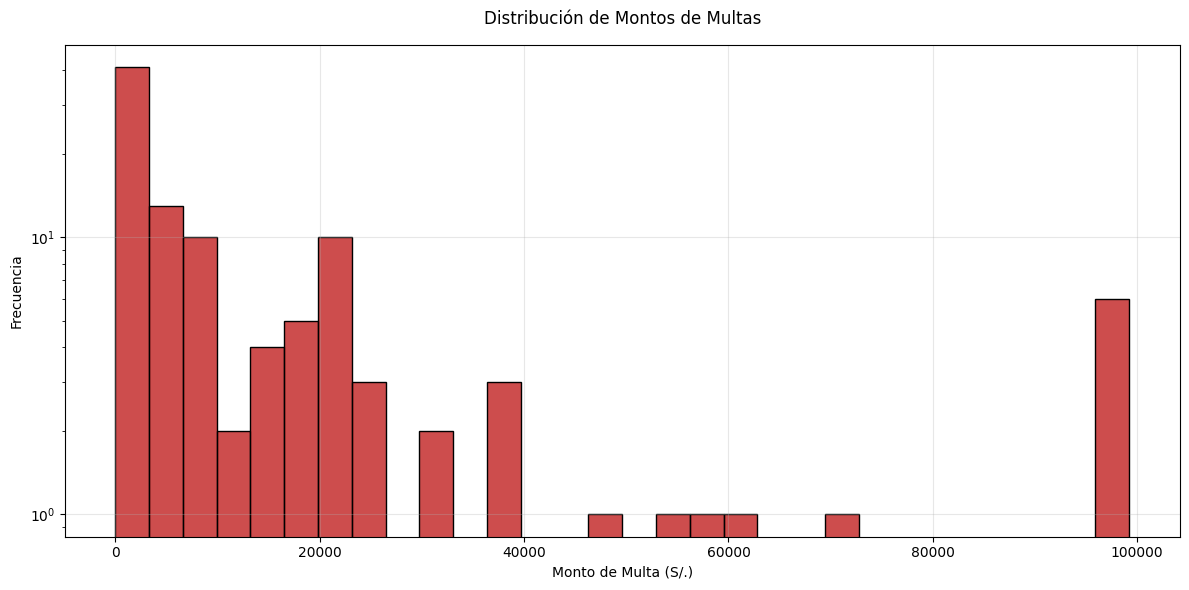

In [23]:
merged_data['MONTO_MULTA'] = pd.to_numeric(merged_data['MONTO_MULTA'].astype(str).str.replace(',', ''), errors='coerce')
plt.figure(figsize=(12, 6))
sns.histplot(data=merged_data, x='MONTO_MULTA', bins=30, color='#b90202', alpha=0.7)
plt.title('Distribución de Montos de Multas', fontsize=12, pad=15)
plt.xlabel('Monto de Multa (S/.)', fontsize=10)
plt.ylabel('Frecuencia', fontsize=10)
plt.yscale('log')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [35]:
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import numpy as np

# 1. Distribución de Montos de Multas (Box Plot con Violín)
fig = go.Figure()
fig.add_trace(go.Violin(
    y=merged_data['MONTO_MULTA'],
    box_visible=True,
    line_color='#b90202',
    fillcolor='rgba(213, 20, 20, 0.5)',
    opacity=0.6,
    name='Distribución'
))
fig.update_layout(
    title='Distribución de Montos de Multas',
    yaxis_title='Monto de Multa (S/.)',
    template='plotly_white',
    showlegend=False
)
fig.show()

In [38]:
temporal = merged_data.groupby('V_NUMPERIOD').agg({
    'MONTO_MULTA': ['count', 'mean', 'sum']
}).reset_index()
temporal.columns = ['periodo', 'cantidad', 'promedio', 'total']

fig = make_subplots(specs=[[{"secondary_y": True}]])
fig.add_trace(
    go.Scatter(
        x=temporal['periodo'],
        y=temporal['promedio'],
        name="Monto Promedio",
        line=dict(color='#d51414', width=3)
    ),
    secondary_y=False,
)
fig.add_trace(
    go.Bar(
        x=temporal['periodo'],
        y=temporal['cantidad'],
        name="Cantidad de Multas",
        marker_color='rgba(213, 20, 20, 0.3)'
    ),
    secondary_y=True,
)
fig.update_layout(
    title='Evolución Temporal de Multas',
    template='plotly_white',
    xaxis_title="Período",
    yaxis_title="Monto Promedio (S/.)",
    yaxis2_title="Cantidad de Multas"
)
fig.show()

In [41]:
categories = ['Multas', 'Trabajadores Afectados', 'Trabajadores TC',
              'Trabajadores Temp.', 'Hombres', 'Mujeres']

values = [
    merged_data['MONTO_MULTA'].mean(),
    merged_data['TRAB_AFEC'].mean(),
    merged_data['ntrab_tc_indet'].mean(),
    merged_data['ntrab_tc_nattemp'].mean(),
    merged_data['ntrab_hombres'].mean(),
    merged_data['ntrab_mujeres'].mean()
]

# Normalizar valores
values_normalized = [v/max(values) * 100 for v in values]

fig = go.Figure(data=go.Scatterpolar(
    r=values_normalized,
    theta=categories,
    fill='toself',
    line_color='#d51414',
    fillcolor='rgba(213, 20, 20, 0.3)'
))
fig.update_layout(
    polar=dict(
        radialaxis=dict(
            visible=True,
            range=[0, 100]
        )),
    showlegend=False,
    title='Análisis Multidimensional de Indicadores',
    template='plotly_white'
)
fig.show()

In [42]:
fig = px.sunburst(
    merged_data,
    path=['sector', 'Departamento_ct'],
    values='numtra',
    color='MONTO_MULTA',
    color_continuous_scale=['rgba(213, 20, 20, 0.3)', '#d51414'],
    title='Composición de Trabajadores por Sector y Departamento'
)
fig.update_layout(template='plotly_white')
fig.show()

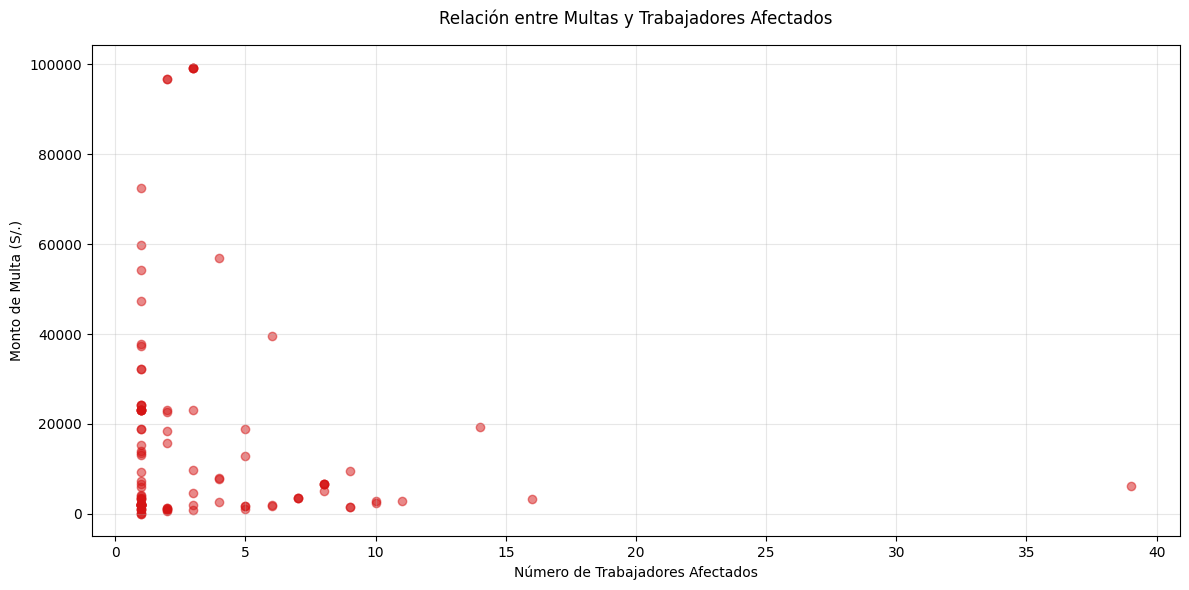

In [26]:
merged_data['TRAB_AFEC'] = pd.to_numeric(merged_data['TRAB_AFEC'].astype(str).str.replace(',', ''), errors='coerce')
plt.figure(figsize=(12, 6))
plt.scatter(merged_data['TRAB_AFEC'], merged_data['MONTO_MULTA'], color='#d51414', alpha=0.5)
plt.title('Relación entre Multas y Trabajadores Afectados', fontsize=12, pad=15)
plt.xlabel('Número de Trabajadores Afectados', fontsize=10)
plt.ylabel('Monto de Multa (S/.)', fontsize=10)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

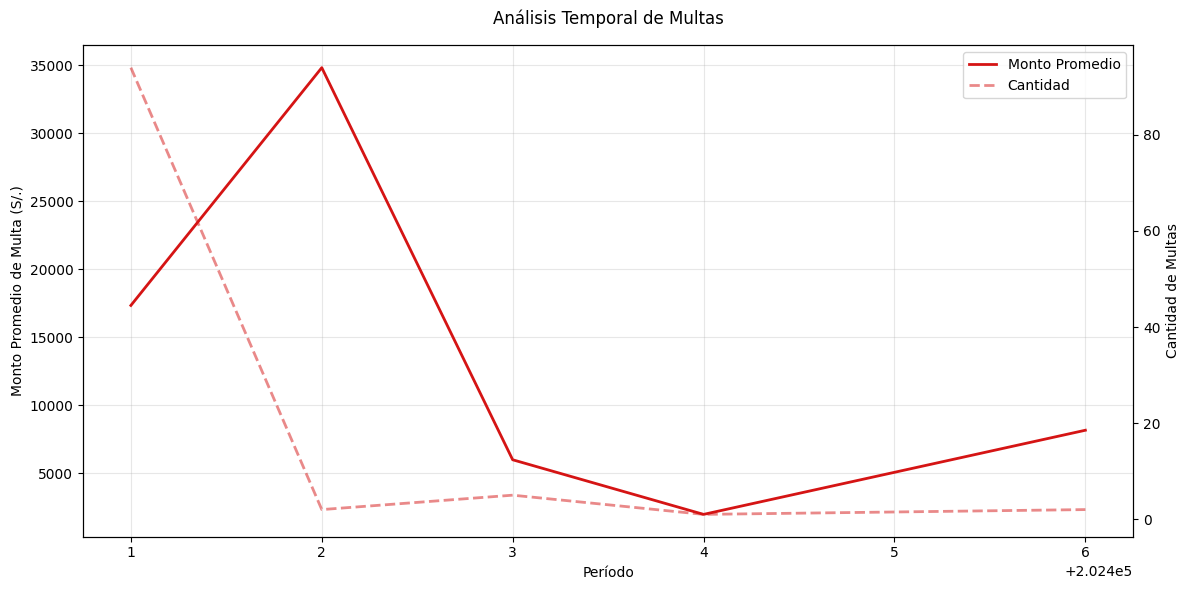

In [27]:
temporal = merged_data.groupby('V_NUMPERIOD')['MONTO_MULTA'].agg(['mean', 'count']).reset_index()

fig, ax1 = plt.subplots(figsize=(12, 6))
ax1.set_xlabel('Período')
ax1.set_ylabel('Monto Promedio de Multa (S/.)')
line1 = ax1.plot(temporal['V_NUMPERIOD'], temporal['mean'], color='#d51414', linewidth=2, label='Monto Promedio')
ax1.tick_params(axis='y')
ax1.grid(True, alpha=0.3)
ax2 = ax1.twinx()
ax2.set_ylabel('Cantidad de Multas')
line2 = ax2.plot(temporal['V_NUMPERIOD'], temporal['count'], color='#d51414',
                 linestyle='--', linewidth=2, alpha=0.5, label='Cantidad')

lines = line1 + line2
labels = [l.get_label() for l in lines]
ax1.legend(lines, labels, loc='upper right')

plt.title('Análisis Temporal de Multas', fontsize=12, pad=15)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

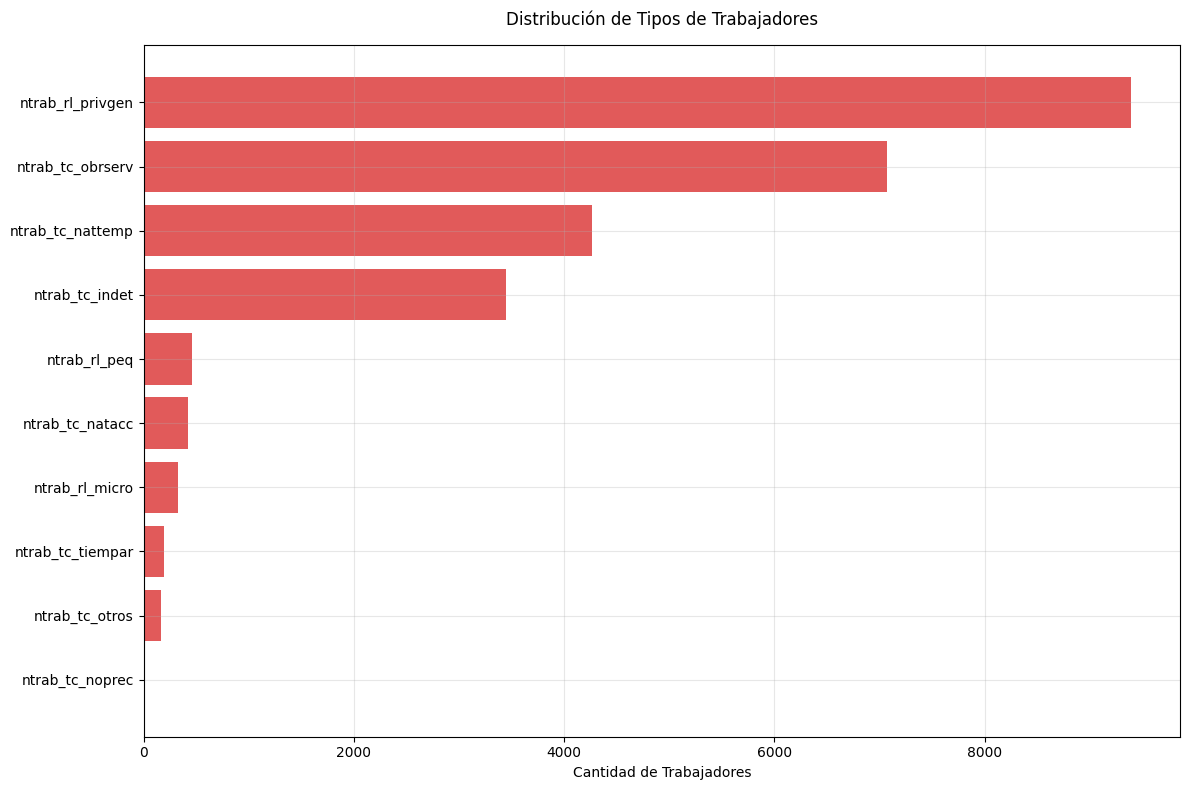

In [28]:
trabajadores_cols = [col for col in merged_data.columns if col.startswith('ntrab_')][:10]
for col in trabajadores_cols:
    merged_data[col] = pd.to_numeric(merged_data[col].astype(str).str.replace(',', ''), errors='coerce')

trabajadores_suma = merged_data[trabajadores_cols].sum().sort_values(ascending=True)

plt.figure(figsize=(12, 8))
bars = plt.barh(range(len(trabajadores_suma)), trabajadores_suma.values, color='#d51414', alpha=0.7)
plt.yticks(range(len(trabajadores_suma)), trabajadores_suma.index)
plt.title('Distribución de Tipos de Trabajadores', fontsize=12, pad=15)
plt.xlabel('Cantidad de Trabajadores', fontsize=10)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

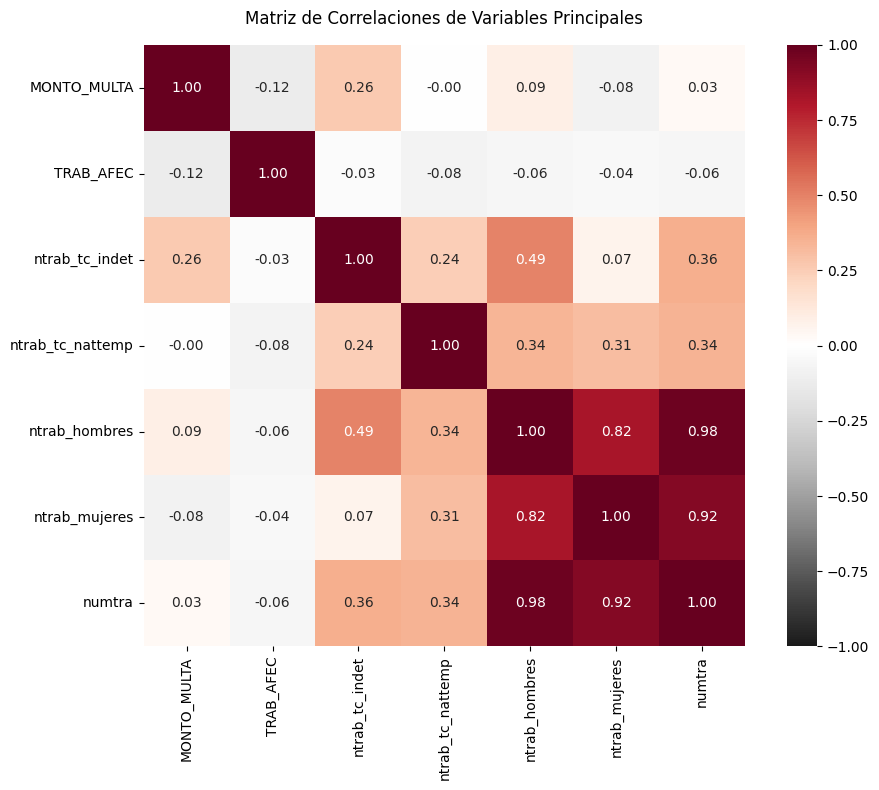

In [33]:
main_vars = ['MONTO_MULTA', 'TRAB_AFEC', 'ntrab_tc_indet', 'ntrab_tc_nattemp',
             'ntrab_hombres', 'ntrab_mujeres', 'numtra']
main_vars = [var for var in main_vars if var in merged_data.columns]

for col in main_vars:
    if col in merged_data.columns:
        merged_data[col] = pd.to_numeric(merged_data[col].astype(str).str.replace(',', ''), errors='coerce')

correlation_matrix = merged_data[main_vars].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='RdGy_r',
            center=0, vmin=-1, vmax=1, square=True, fmt='.2f')
plt.title('Matriz de Correlaciones de Variables Principales', fontsize=12, pad=15)
plt.tight_layout()
plt.show()

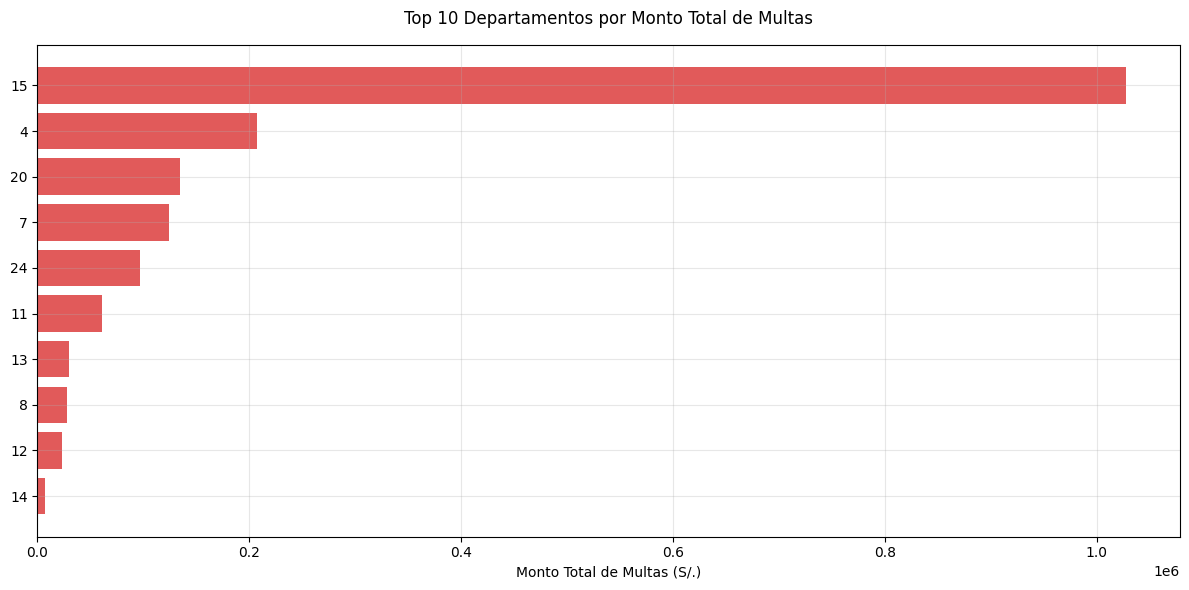

In [32]:
top_deps = merged_data.groupby('Departamento_ct')['MONTO_MULTA'].sum().sort_values(ascending=True).tail(10)

plt.figure(figsize=(12, 6))
bars = plt.barh(range(len(top_deps)), top_deps.values, color='#d51414', alpha=0.7)
plt.yticks(range(len(top_deps)), top_deps.index)
plt.title('Top 10 Departamentos por Monto Total de Multas', fontsize=12, pad=15)
plt.xlabel('Monto Total de Multas (S/.)', fontsize=10)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [54]:
merged_data.to_csv('data_total.csv',index=False)